# Николаев Евгений Алексеевич, группа 22.М08

## Задание №4
Применение производных.
- Лапласиан и подъем высоких частот.
См. примеры 3.15 и 3.16, коэфф = 1, 1.5, 1.7, 2, ...
- Градиент. Комбинирование методов. См. примеры пр.3.17 и рис. 3.43.

In [30]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image

In [8]:
def filtration(image, transformation_function, **kernel_size):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # считывание изображения
    filtered_img = transformation_function(img, **kernel_size)
    plt.figure(figsize=(20, 5), dpi=200)
    plt.subplot(141); 
    plt.imshow(img,cmap='gray') # вывод изначального изображения
    plt.title("Оригинальное изображение") 
    plt.subplot(142)
    plt.imshow(filtered_img,cmap='gray') # вывод отфильтрованного изображения
    plt.title("Обработанное изображение") 
    
def filtration_2(image, transformation_function, **kernel_size):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # считывание изображения
    filtered_img = transformation_function(img, **kernel_size)
    plt.figure(figsize=(20, 5), dpi=200)
    plt.subplot(141); 
    plt.imshow(img,cmap='gray') # вывод изначального изображения
    plt.title("Оригинальное изображение") 
    plt.subplot(142)
    plt.imshow(filtered_img,cmap='gray') # вывод отфильтрованного изображения
    plt.title("Обработанное изображение") 

## Лапласиан 

Лапласианов фильтр является одним из методов подъема высоких частот в обработке изображений. Он используется для выделения высокочастотных компонент изображения, которые соответствуют деталям и границам объектов на изображении.

В терминах математики, лапласиан является оператором второй производной, который вычисляет разность между средним значением интенсивности пикселей и интенсивностью пикселя в текущей точке. Положительные значения лапласиана соответствуют участкам, где интенсивность пикселей возрастает быстрее, чем в среднем, а отрицательные значения - где интенсивность пикселей убывает быстрее, чем в среднем.

При этом, лапласианов фильтр может быть использован для усиления высоких частот на изображении, так как онвыделяет разности в интенсивности пикселей, что соответствует высокочастотным компонентам изображения. Это может привести к увеличению контрастности и резкости границ объектов на изображении, что может быть полезным в некоторых задачах обработки изображений.

Однако, лапласианов фильтр может также усилить шум на изображении, что может быть нежелательным. Поэтому, для улучшения результатов подъема высоких частот, лапласианов фильтр может быть использован в сочетании с другими методами обработки изображений, такими как пороговая фильтрация или сглаживание изображения.

Фильтр используется для подсветки (выделения) границ и повышения резкости. Его применение подчеркивает разрывы уровней яркостей на изображении и подавляет области со слабыми изменениями яркостей.

Суть данного преобразования состоит в построении маски фильтра и его наложении на изображение. Маска представляет собой двумерный массив (чаще всего, это 3x3).

Применение лапласианова фильтра начинается с вычисления вторых производных яркости пикселей на изображении. Вторая производная яркости пикселей может быть вычислена как сумма разности между яркостью текущего пикселя и яркостью его соседей. Для этого используется матрица-фильтр размером 3x3, которая перемножается с соседними пикселями текущего пикселя. При этом, в центре матрицы находится коэффициент -4, а на остальных позициях - коэффициент 1. 

In [9]:
def apply_laplacian_filter(image, kernel):
    # Создаем пустое изображение такого же размера, как и исходное
    filtered_image = np.zeros_like(image)

    # Применяем фильтр к каждому пикселю изображения
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Вычисляем новое значение пикселя
            pixel_value = np.sum(kernel * image[i-1:i+2, j-1:j+2])
            
            # Ограничиваем значения пикселей от 0 до 255
            pixel_value = max(0, min(pixel_value, 255))

            # Сохраняем новое значение пикселя в отфильтрованном изображении
            filtered_image[i, j] = pixel_value

    return filtered_image

Функция начинает с создания пустого массива filtered_image такого же размера, что и исходное изображение, куда будет сохранено отфильтрованное изображение.

Затем функция проходится по каждому пикселю изображения, начиная с пикселя с индексами (1, 1) и заканчивая пикселем с индексами (image.shape[0]-2, image.shape[1]-2). Для каждого пикселя функция вычисляет новое значение, используя переданный лапласианов фильтр. Для этого она берет срезы изображения размером 3x3 вокруг текущего пикселя и перемножает их с фильтром, затем находит сумму всех элементов полученного массива. Полученное значение ограничивается от 0 до 255, чтобы оно соответствовало диапазону значений яркости пикселей на изображении.

Новое значение пикселя сохраняется в соответствующей ячейке отфильтрованного изображения filtered_image.

В конце функция возвращает отфильтрованное изображение.

Функция применяет лапласианов фильтр к каждому пикселю изображения, что позволяет обнаруживать границы объектов на изображении.

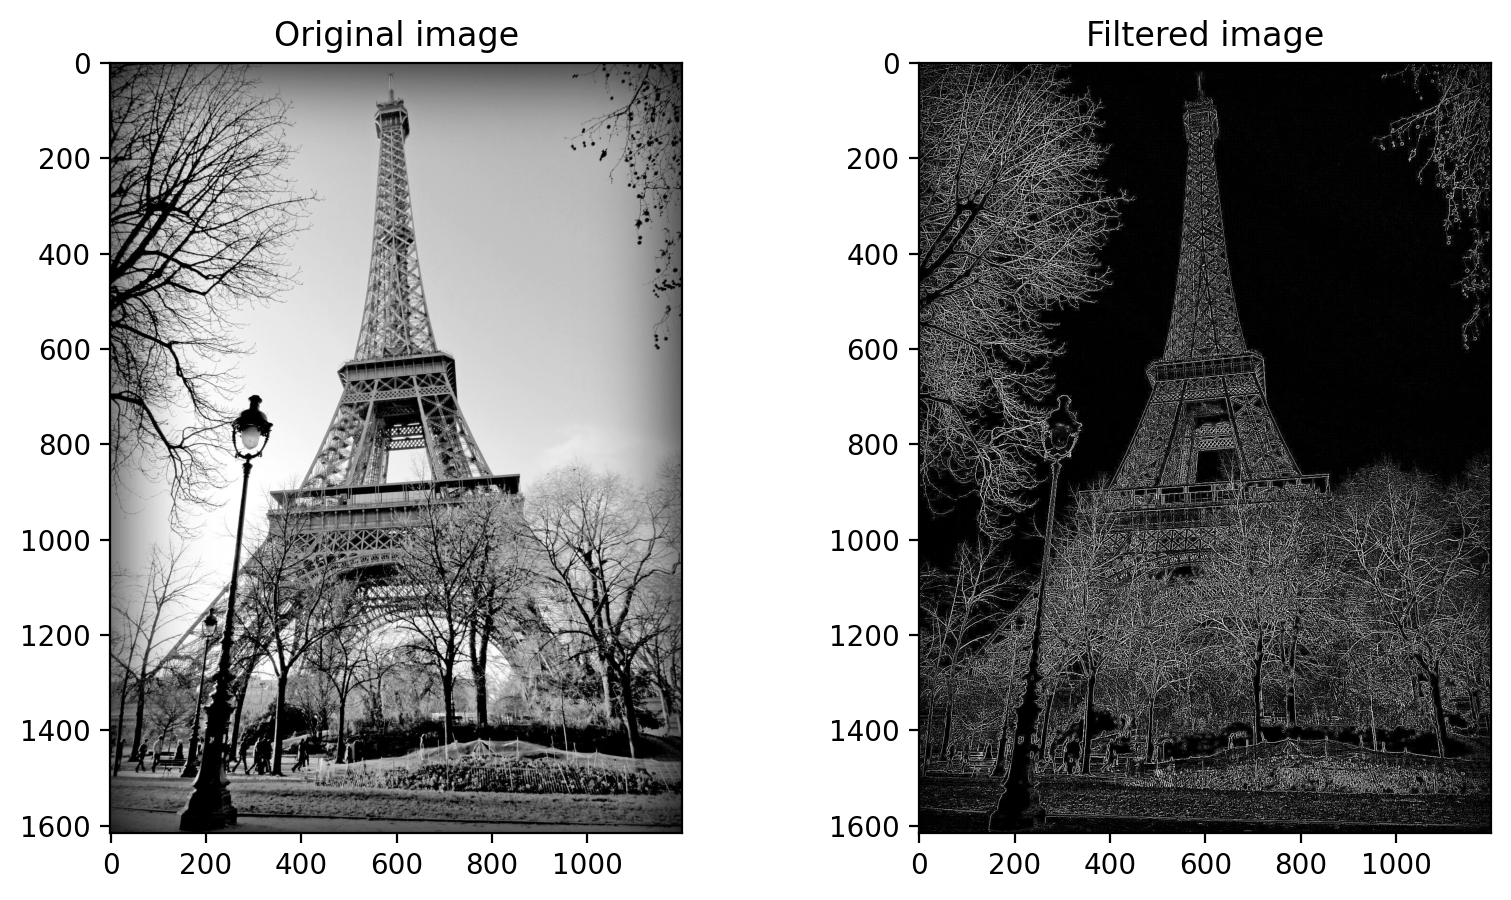

In [21]:
Filter('imgg1.jpg', apply_laplacian_filter, kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]))

- Выделение границ объектов: лапласианов фильтр выделяет разность между яркостью пикселей на изображении, особенно на границах объектов, где яркость изменяется быстрее. Это позволяет выделить границы объектов на изображении более четко и контрастно.

- Увеличение контрастности: в зависимости от конкретного изображения, применение лапласианова фильтра может привести к увеличению контрастности на изображении, так как он выделяет разность междуяркостью пикселей на изображении, что может привести к более ярким и контрастным изображениям.

- Увеличение деталей: лапласианов фильтр может выделять мелкие детали на изображении, такие как текстуры и мелкие объекты, что может быть полезно в определенных задачах обработки изображений.

НО

- Усиление шума: лапласианов фильтр приводит к усилению шума на изображении, так как он усиливает высокочастотные компоненты изображения, которые могут быть связаны со случайными шумами на изображении.

- Искажение формы объектов: применение лапласианова фильтра может привести к искажению формы объектов на изображении, особенно когда он применяется к объектам с круглой или гладкой формой.


## Нерезкое маскирование и фильтрация с подъемом высоких частот

Нерезкое маскирование - это метод увеличения резкости изображения путем создания маски, которая вычитается из исходного изображения. Маска создается путем размытия изображения с помощью гауссового фильтра, а затем вычитается из исходного изображения с некоторым коэффициентом масштабирования. Этот метод позволяет увеличить резкость границ и деталей на изображении.

Эта процедуравыражается формулой:

$$
g(x,y) = f(x,y) + k \cdot (f(x,y) - \text{LPF}(f(x,y)))
$$

Здесь $f(x,y)$ - это яркость пикселя изображения в точке $(x,y)$, $g(x,y)$ - это значение пикселя после обработки, $k$ - это коэффициент, который контролирует силу эффекта повышения резкости, а $\text{LPF}(f(x,y))$ - это результат применения фильтра к исходному изображению $f(x,y)$.


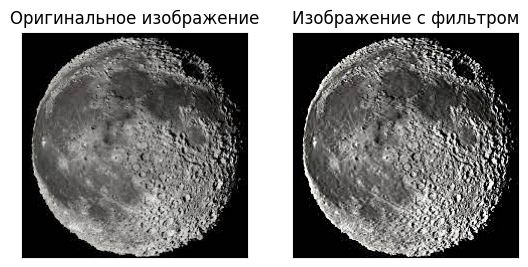

In [35]:
img = Image.open("imgg3.jfif")
img_array = np.array(img)

# Определение размера маски
size = 3

# Создание маски
mask = np.ones((size, size))
mask = mask / np.sum(mask)

# Применение маски
blurred = np.zeros_like(img_array, dtype=np.float32)
for i in range(3):
    blurred[:,:,i] = np.convolve(img_array[:,:,i].ravel(), mask.ravel(), mode="same").reshape(img_array[:,:,i].shape)

# Получение изображения с увеличенной резкостью
unsharp = np.clip(2 * img_array.astype(np.float32) - blurred, 0, 255).astype(np.uint8)

# Преобразование обратно в объект Image
result_img = Image.fromarray(unsharp)

# Сохранение результата
result_img.save("gaussian.jpg")

# Построение графика сравнения исходного изображения и обработанного изображия с гауссовым фильтром
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Оригинальное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result_img,cmap = 'gray')
plt.title('Изображение с фильтром'), plt.xticks([]), plt.yticks([])
plt.show()

На изображении видно изменение резкости, за счет чего детальнее можно разглядеть рельеф луны

## Градиент

Использование производных первого порядка, таких как градиент, является одним из методов нелинейного повышения резкости изображений. Градиент - это вектор, который показывает направление наибольшего изменения яркости в каждой точке изображения. Он может быть вычислен с помощью операторов Собеля.

Функция Градиент Скобеля - это оператор, используемый для обнаружения границ на изображении. Математический оператор Градиент Скобеля можно представить как два ядра свертки - одно для вычисления градиента по горизонтали (Gx), а другое - по вертикали (Gy). Каждое ядро представляет собой матрицу с весами, которые определяют вклад каждого соседнего пикселя в вычисление градиента. Градиент - это вектор, который указывает направление наибольшего возрастания функции в каждой точке. Он является основным понятием в математическом анализе и оптимизации функций. Градиент функции определяется как вектор, состоящий из частных производных функции по каждой переменной. Этот вектор имеет важное геометрическое свойство — он указывает на направление наибольшего возрастания f в точке (x,y).

Конкретно, оператор Градиент Скобеля вычисляет градиент изображения вдоль осей x и y следующим образом:

Применить свертку изображения с двумя ядрами (масками) размером 3x3, известными как ядра Собеля. Одно ядро вычисляет градиент вдоль оси x,    
    Gx = 
    [-1, 0, 1]  
    [-2, 0, 2]  
    [-1, 0, 1]  
а другое - вдоль оси y.   
    Gy = 
    [-1, -2, -1 ]  
    [ 0 , 0 , 0 ]  
    [ 1 , 2 , 1 ]  

Таким образом, функция Градиент Скобеля вычисляет градиент интенсивностей пикселей вдоль горизонтальной (Gx) и вертикальной (Gy) осей, а затем определяет величину градиента (GradientMagnitude) в каждой точке изображения.

Для каждого пикселя в изображении вычислить значение градиента как корень квадратный из суммы квадратов разностей между суммой значений пикселей под ядром, соответствующим оси x, и суммой значений пикселей под ядром, соответствующим оси y.

Для использования градиента для повышения резкости изображений, можно применить следующий алгоритм:

- Вычислить градиент изображения с помощью оператора Собеля.
- Прибавить градиент к исходному изображению с некоторым коэффициентом масштабирования.
- Ограничить значения пикселей полученного изображения от 0 до 255.

Этот метод заключается в добавлении градиента к исходному изображению с некоторым коэффициентом масштабирования. Градиент может улучшить границы и детали на изображении, однако может также привести к увеличению шумов на некоторых участках изображения.

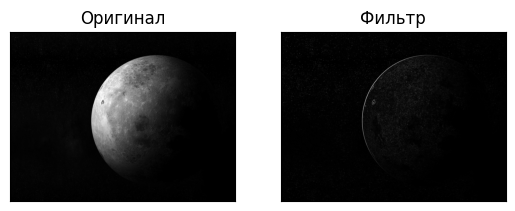

In [47]:
import cv2 as cv

def sobel(image):
    # применяем оператор Собеля по оси x
    sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    # применяем оператор Собеля по оси y
    sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
    # вычисляем градиент изображения
    gradient = np.sqrt(np.square(sobelx) + np.square(sobely))
    # нормализуем значения градиента
    gradient = np.uint8(gradient / np.max(gradient) * 255)
    return gradient

image = cv.imread('imgg4.jpg', 0)
res = sobel(image)
cv.imwrite('grad_original.png', image)
cv.imwrite('grad.png', res)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Оригинал'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res,cmap = 'gray')
plt.title('Фильтр'), plt.xticks([]), plt.yticks([])
plt.show()

Оператор Градиент Скобеля часто используется в обработке изображений и компьютерном зрении, так как он помогает выделять границы объектов на изображениях, что может быть полезно для детектирования объектов, сегментации изображений и других задач обработки изображений.

## Комбинирование методов

Комбинирование методов пространственного улучшения может быть достигнуто путем комбинирования различных операций на изображении, таких как оператор Лапласа, повышение резкости, градиентный оператор Собела и т.д

Комбинирование этих методов может быть полезным для улучшения качества изображения, особенно если оно содержит много деталей и краев. Например, можно сначала применить метод Лапласа для выделения краев на изображении, затем применить повышение резкости, чтобы усилить контрастность краев, а затем использовать градиентный оператор Собела для уточнения деталей на изображении. Однако важно помнить, что каждый из этих методов может иметь свои недостатки, и комбинация методов может не всегда привести к оптимальному результату в зависимости от конкретной задачи и характеристикизображения.

In [55]:
def enhance_image(image):
    # Применяем градиентный оператор Собела к изображению
    gradient_image = gradient(image)
    
    kernel = np.array([
        [1, 1, 1],
        [1, -8, 1],
        [1, 1, 1]
    ])
    laplacian_image = laplacian_filter(image, kernel)
    
    # Складываем изображения с коэффициентами 0.5
    combined_image = 0.5 * gradient_image + 0.5 * laplacian_image
    
    # Ограничиваем значения пикселей от 0 до 255
    combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)
    
    return combined_image

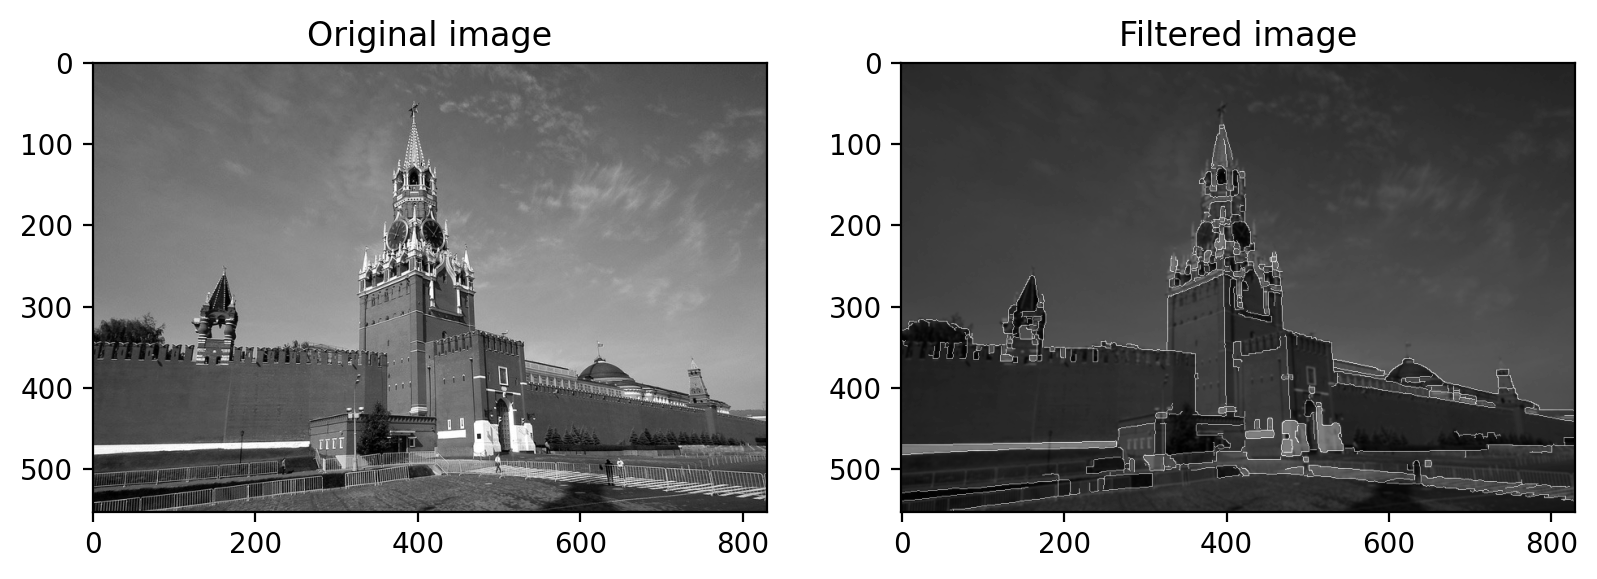

In [54]:
Filter('imgg9.jpg', enhance_image)

Данная функция комбинирует результаты применения двух операторов - градиентного оператора Собеля и оператора Лапласа - для улучшения изображения.

Градиентный оператор Собеля используется для выделения границ объектов на изображении, а оператор Лапласа - для обнаружения изменений яркости на изображении.

Комбинируя результаты двух операторов с помощью коэффициентов 0.5, функция создает новое изображение, в котором границы объектов более ярко выражены, а также более заметны изменения яркости.

Возвращаемое функцией улучшенное изображение будет содержать более контрастные границы объектов и более ярко выраженные детали. Результат выполнения функции зависит от исходного изображения, на которое она применяется.